# Modeling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/data_cleaned.csv')

In [3]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
1,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667
2,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,6000.000000
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5869 non-null   object 
 1   total_sqft      5869 non-null   float64
 2   bath            5869 non-null   float64
 3   balcony         5869 non-null   float64
 4   price           5869 non-null   float64
 5   bhk             5869 non-null   int64  
 6   price_per_sqft  5869 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 321.1+ KB


## One-hot encoding

In [5]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df2 = pd.concat([df, dummies.drop('Yeshwanthpur', axis = 1)], axis = 1)
df2.head(3)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,6000.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df3 = df2.drop(['location', 'price_per_sqft'], axis = 1)
df3.head(3)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,6.0,2.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,3.0,2.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df3.drop('price', axis = 1)
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,3.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y = df3.price
Y.head(3)

0    194.0
1    125.0
2     60.0
Name: price, dtype: float64

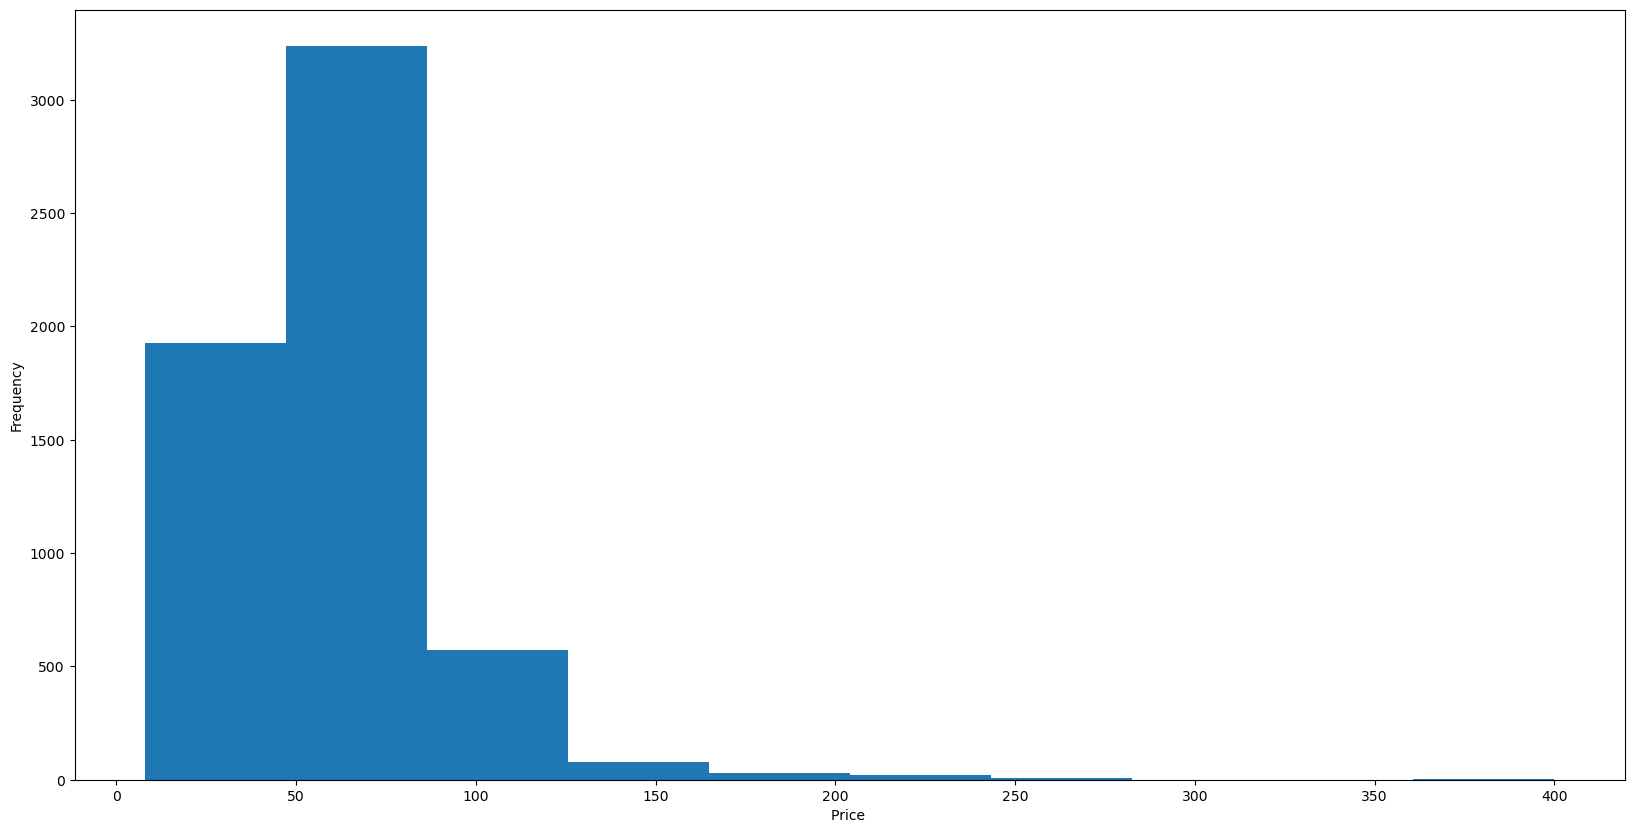

In [10]:
plt.hist(df3['price'], bins=10)
plt.xlabel('Price ')
plt.ylabel('Frequency')
plt.show()

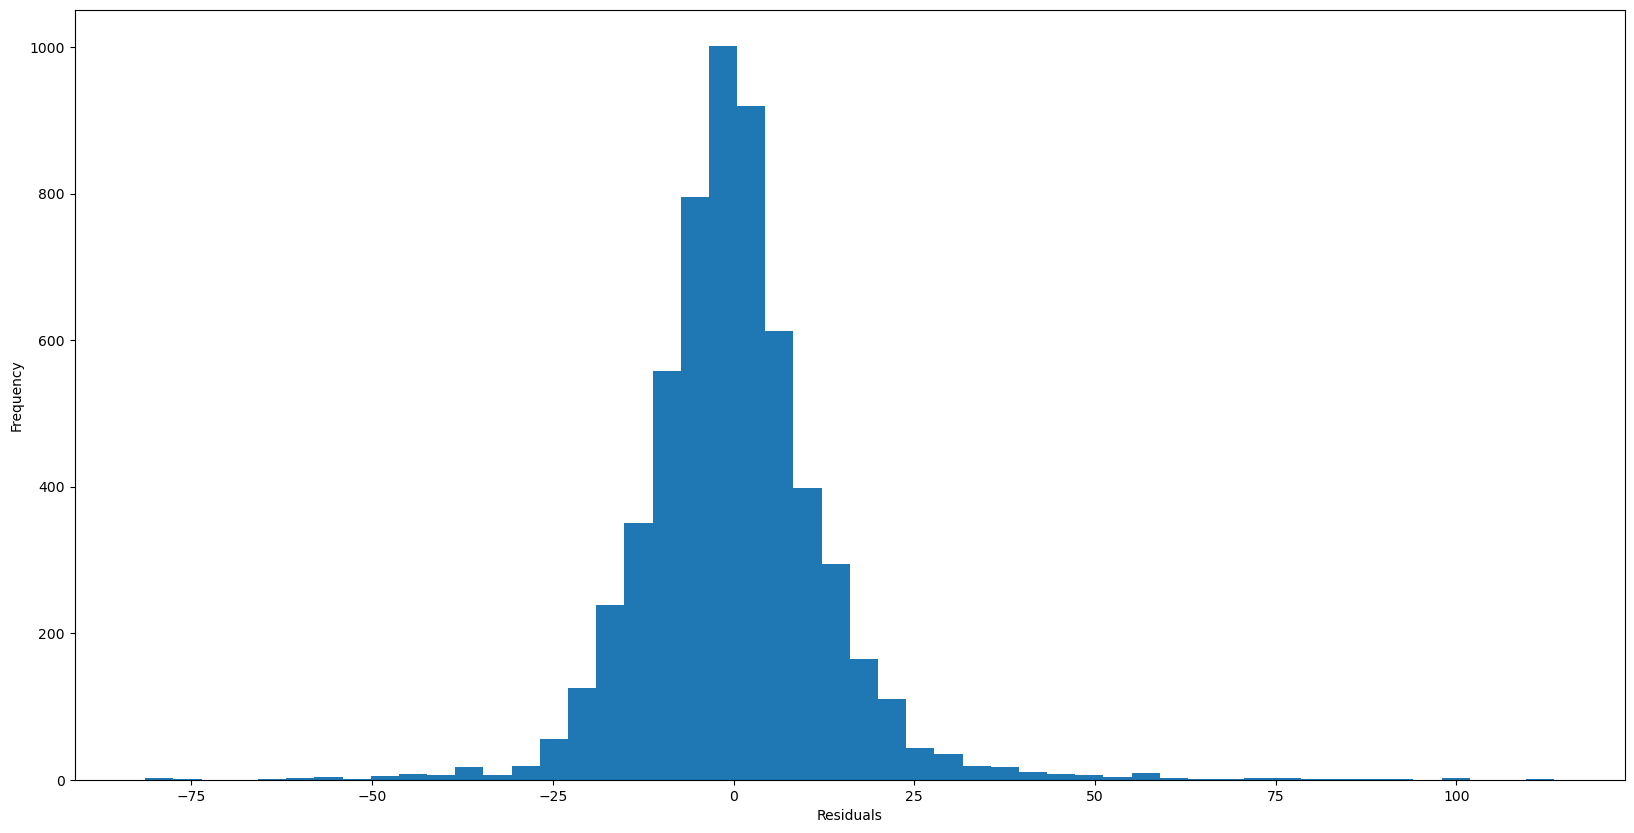

In [11]:
import statsmodels.api as sm
model = sm.OLS(Y, sm.add_constant(X)).fit()
y_pred = model.predict(sm.add_constant(X))

residuals = Y - y_pred
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

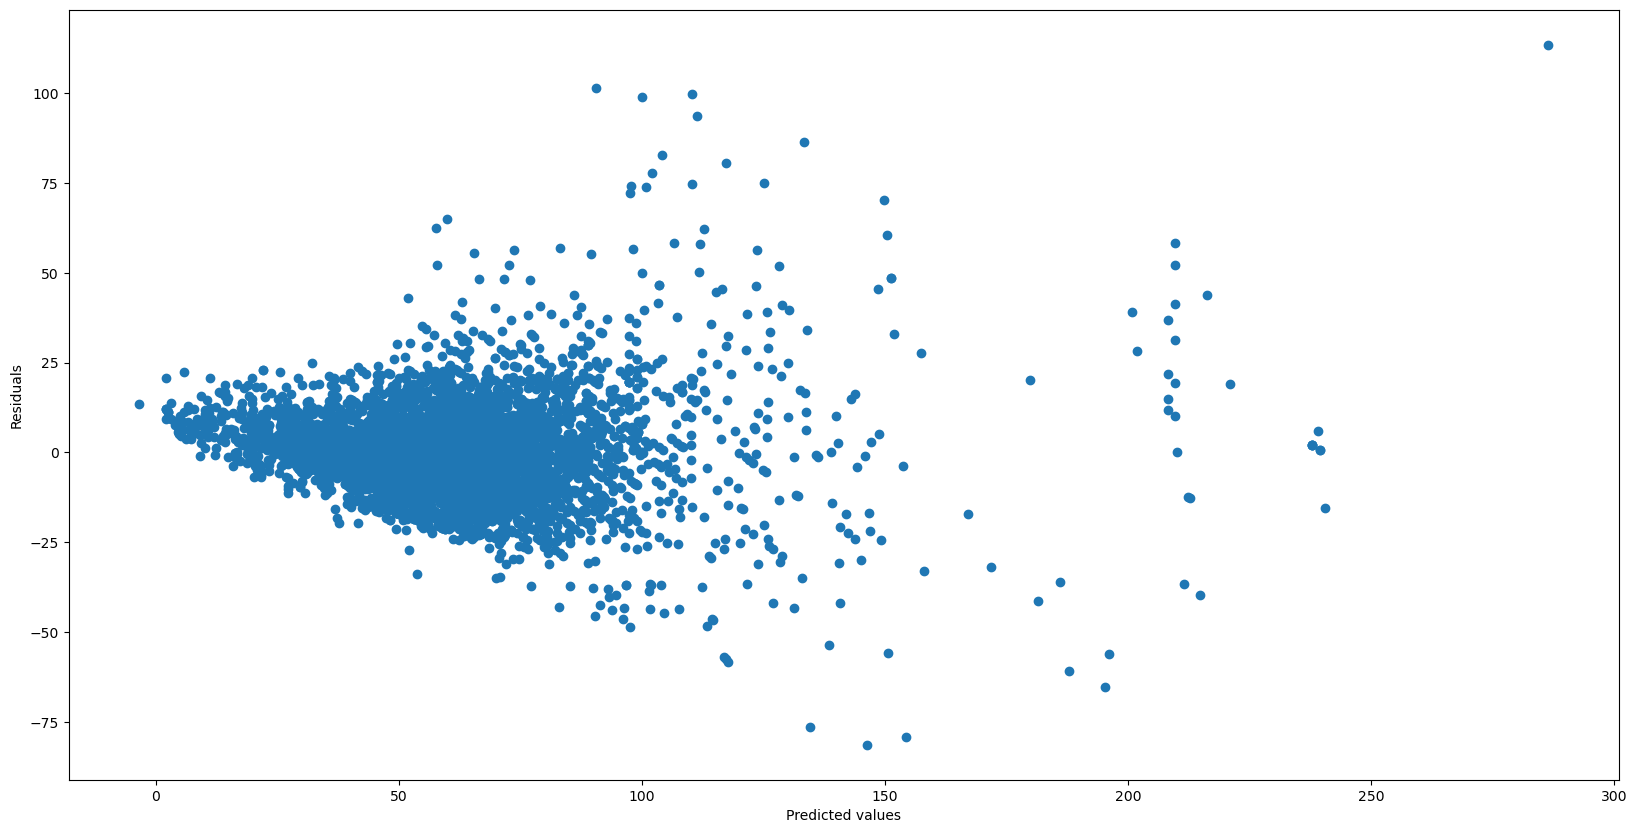

In [12]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

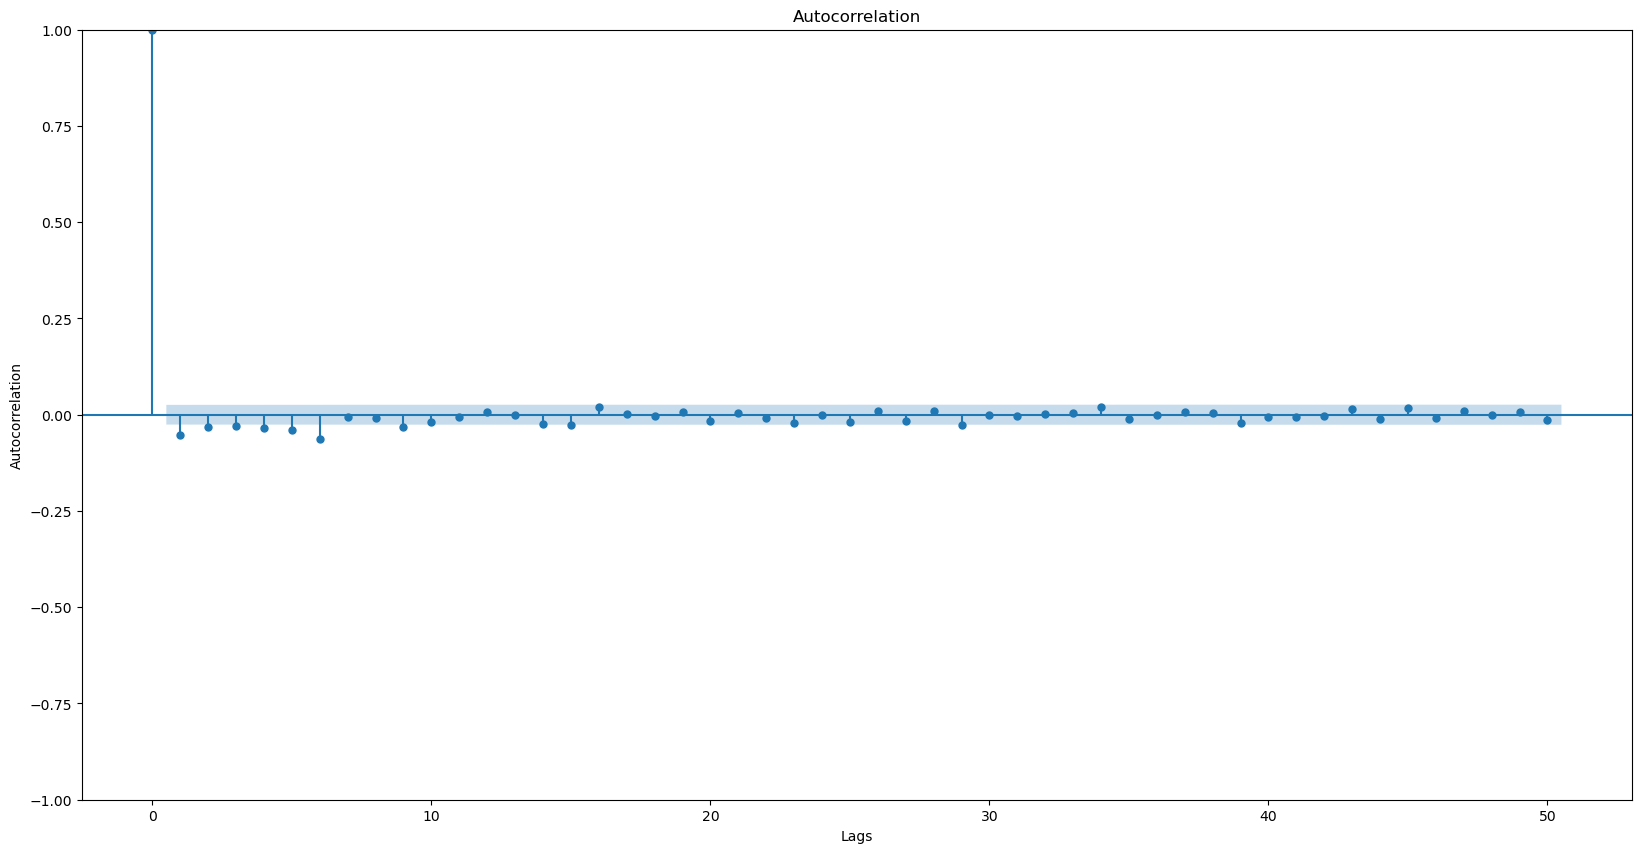

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X[['total_sqft','bath','balcony','bhk']])
vif = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

[20.267533998836956, 2.6921310468707436, 3.2183003542471744, 1.261106427628573, 3.4962185296208275]


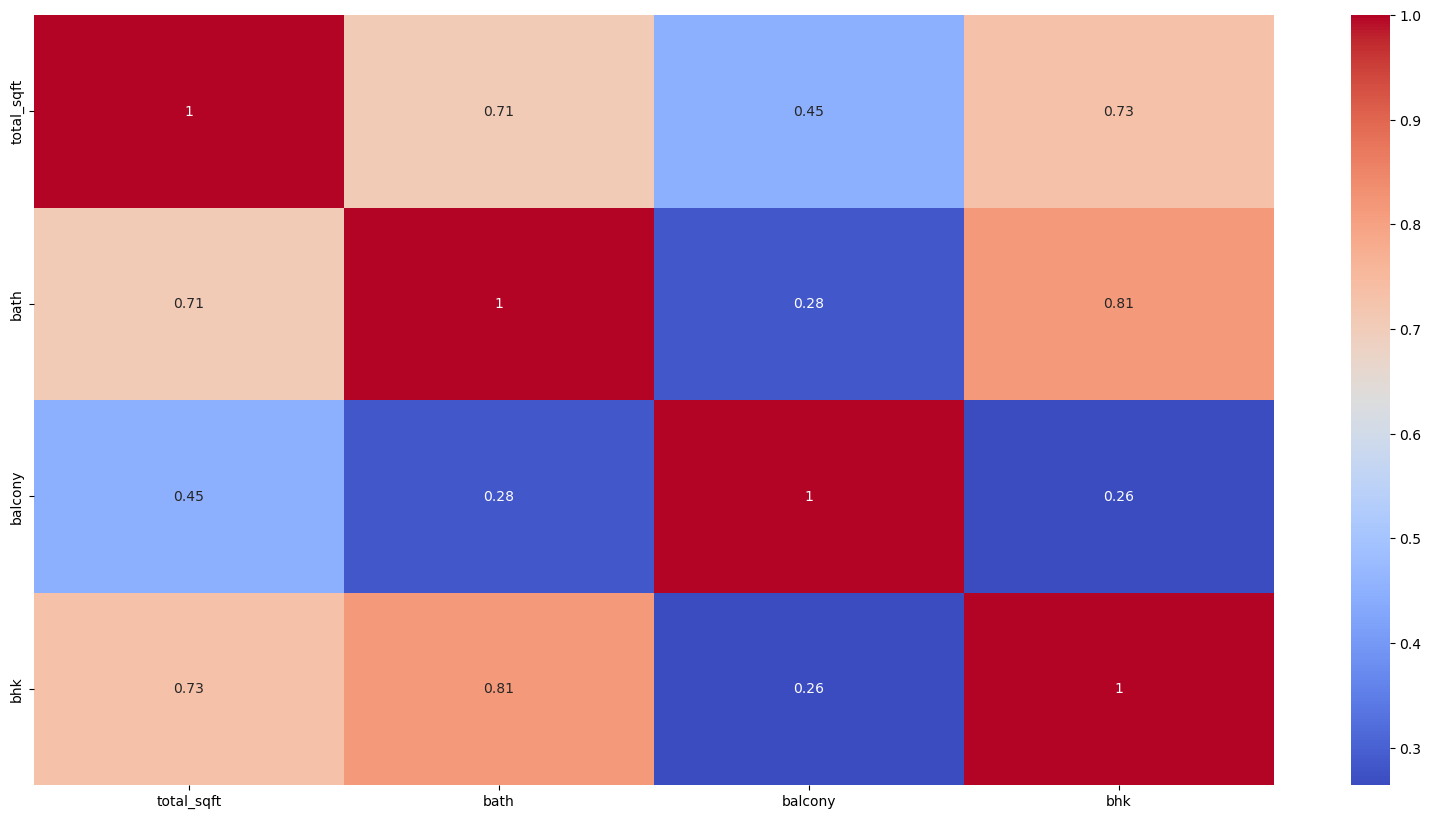

In [15]:
import seaborn as sns

corr_matrix = df3[['total_sqft','bath','balcony','bhk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Model

In [16]:
X_new = X.drop('balcony', axis=1)
X_new.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,3.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Y_log = np.log(Y)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_log, test_size = 0.2, random_state = 2023)

In [19]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.7805716991552014

In [20]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([ 7.30120510e-01,  7.69771752e-01, -2.18075569e+17,  7.40733546e-01,
        7.66523065e-01])

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# find which algorithm is the best
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(), 
            'params' : {
                'normalize' :[True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size =0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [22]:
find_best_model_using_gridsearchcv(X,Y)

/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

,model,best_score,best_params
0,linear_regression,-4.361511e+16,{'normalize': False}
1,lasso,4.086732e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,6.311318e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [23]:
dtr = DecisionTreeRegressor(criterion='mse', splitter = 'random')
dtr.fit(X_train, Y_train)
dtr.score(X_test, Y_test)

/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.682896430794933

In [24]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X_new.columns==location)[0][0]
    x = np.zeros(len(X_new.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return np.exp(lr_clf.predict([x])[0])

In [25]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.52878118879553

In [26]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.3802090376404

In [27]:
predict_price('Indira Nagar',1000, 2, 2)

/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.52356830996051

In [28]:
import pickle
with open('banglore_home_prices_model_pickel', 'wb') as f:
    pickle.dump(lr_clf,f)

In [29]:
import json
columns = {
    'data_columns': [col.lower() for col in X_new.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))